# Link prediction

In [1]:
%load_ext autoreload
%autoreload 2

import random
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from IPython.display import Image
from itertools import combinations
from utils.mapa_estudantes import carregar_estudantes

ModuleNotFoundError: No module named 'mapa_estudantes'

In [ ]:
# Criar um grafo direcionado
grafo = nx.DiGraph()
estudantes = carregar_estudantes()

# Cria arestas entre as disciplinas cursadas por um estudante
# Uma aresta é criada entre duas disciplinas se elas foram cursadas em semestres consecutivos
for estudante in estudantes.values():
    for d1, d2 in combinations(estudante.disciplinas, 2):
        if d1.periodo_consecutivo(d2):
            if not grafo.has_edge(d1.codigo, d2.codigo):
                grafo.add_edge(d1.codigo, d2.codigo, weigth=1)
            else:
                grafo[d1.codigo][d2.codigo]["weigth"] += 1

In [ ]:
nx.write_gexf(grafo, "grafo_caminho.gexf")

In [ ]:
# G_karate = nx.karate_club_graph()
G_karate = grafo

# pos = nx.spring_layout(G_karate)
# nx.draw(G_karate, cmap=plt.get_cmap("rainbow"), with_labels=True, pos=pos)

n = G_karate.number_of_nodes()
m = G_karate.number_of_edges()
print("Número de nós : %d" % n)
print("Número de arestas : %d" % m)
# print(
#     "Número de componentes conectados : %d" % nx.number_connected_components(G_karate)
# )

Número de nós : 703
Número de arestas : 30907


In [ ]:
# Remove 20% das arestas
proportion_edges = 0.2
edge_subset = list(random.sample(
    list(G_karate.edges()), int(proportion_edges * G_karate.number_of_edges())
))

# Cria uma cópia do grafo e remove arestas
G_karate_train = G_karate.copy()
G_karate_train.remove_edges_from(edge_subset)

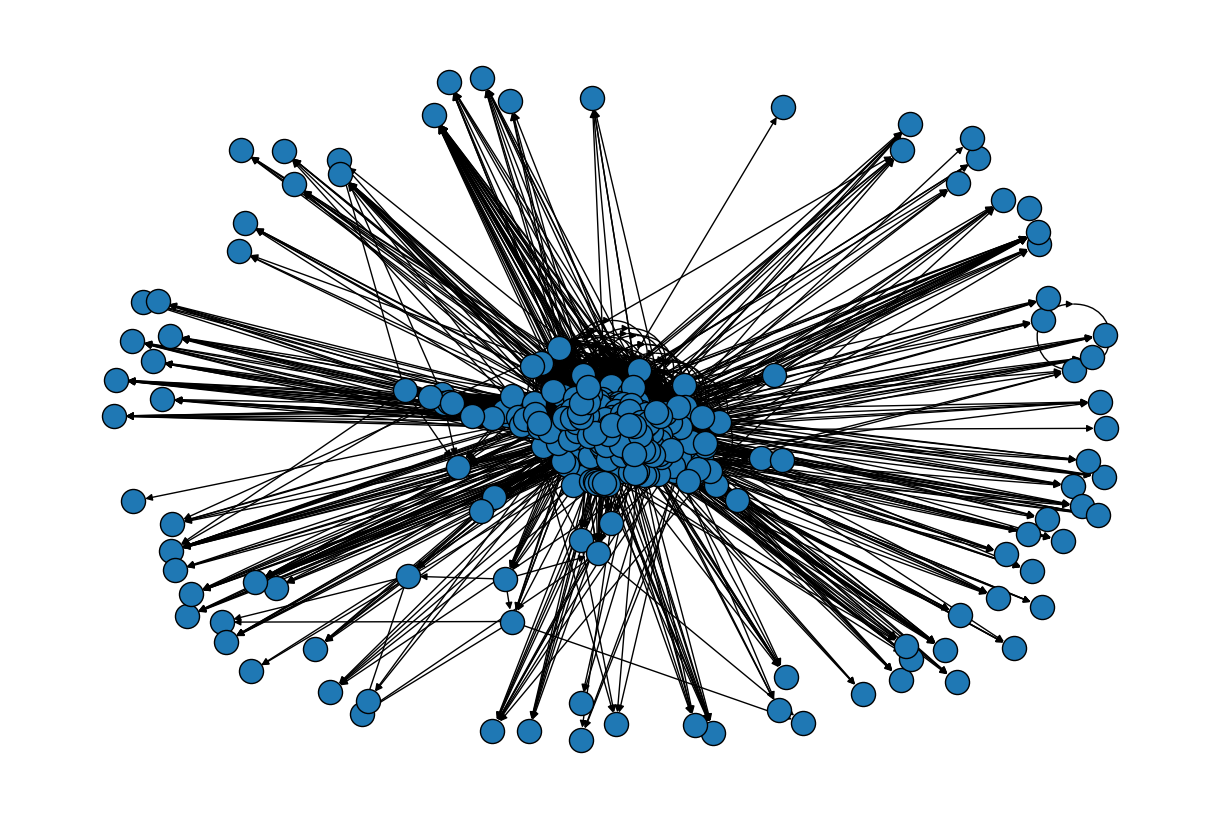

In [ ]:
plt.figure(figsize=(12, 8))
nx.draw(G_karate_train)
plt.gca().collections[0].set_edgecolor("#000000")

In [ ]:
edge_subset_size = len(list(edge_subset))
print("Número de arestas removidas : %d" % edge_subset_size)
print("Número de arestas restantes : %d" % (m - edge_subset_size))

Número de arestas removidas : 6181
Número de arestas restantes : 24726


## Jaccard coefficient

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_auc_score

# Fazendo previsões com o jaccard
pred_jaccard = list(nx.jaccard_coefficient(G_karate_train))

score_jaccard = [s for (u, v, s) in pred_jaccard]
label_jaccard = [(u, v) in edge_subset for (u, v, s) in pred_jaccard]


# Computa o AUC score da curva ROC
fpr_jaccard, tpr_jaccard, _ = metrics.roc_curve(label_jaccard, score_jaccard)
auc_jaccard = roc_auc_score(label_jaccard, score_jaccard)


# Gráfico da curva ROC
plt.title("ROC")
plt.plot(fpr_jaccard, tpr_jaccard, "b", label="AUC = %0.2f" % auc_jaccard)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("Taxa Verdadeiro Positivo")
plt.xlabel("Taxa de Falso Positivo")
plt.show()

NetworkXNotImplemented: not implemented for directed type

## Preferential Attachment

0.5411318150448584


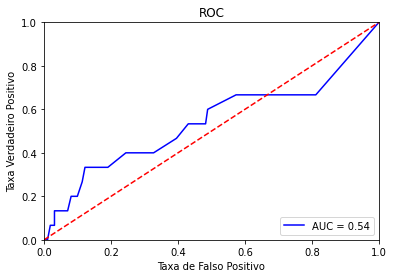

In [ ]:
pred_prefAtch = list(nx.preferential_attachment(G_karate_train))

score_prefAtch = [s for (u, v, s) in pred_prefAtch]

label_prefAtch = [(u, v) in edge_subset for (u, v, s) in pred_prefAtch]

# Computa o AUC score da curva ROC
fpr_prefAtch, tpr_prefAtch, _ = metrics.roc_curve(label_prefAtch, score_prefAtch)
auc_prefAtch = roc_auc_score(label_prefAtch, score_prefAtch)
print(auc_prefAtch)


# Gráfico da curva ROC
plt.title("ROC")
plt.plot(fpr_prefAtch, tpr_prefAtch, "b", label="AUC = %0.2f" % auc_prefAtch)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("Taxa Verdadeiro Positivo")
plt.xlabel("Taxa de Falso Positivo")
plt.show()

## Resource Allocation

0.6272601794340924


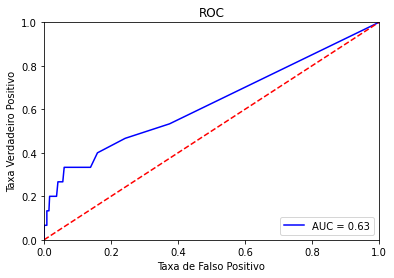

In [ ]:
pred_ra = list(nx.resource_allocation_index(G_karate_train))

score_ra = [s for (u, v, s) in pred_ra]

label_ra = [(u, v) in edge_subset for (u, v, s) in pred_ra]

# Computa o AUC score da curva ROC
fpr_ra, tpr_ra, _ = metrics.roc_curve(label_ra, score_ra)
auc_ra = roc_auc_score(label_ra, score_ra)
print(auc_ra)


# Gráfico da curva ROC
plt.title("ROC")
plt.plot(fpr_ra, tpr_ra, "b", label="AUC = %0.2f" % auc_ra)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("Taxa Verdadeiro Positivo")
plt.xlabel("Taxa de Falso Positivo")
plt.show()

## Common Neighbor Centrality

In [ ]:
## Esta implementação depende do Networkx 2.6 que roda somente no python 3.7. Nesta máquina está com python 3.5

pred_CNC = list(nx.common_neighbor_centrality(G_karate_train))

score_CNC = [s for (u, v, s) in pred_CNC]

label_CNC = [(u, v) in edge_subset for (u, v, s) in pred_CNC]


fpr_CNC, tpr_CNC, _ = metrics.roc_curve(label_CNC, score_CNC)
auc_CNC = roc_auc_score(label_CNC, score_CNC)
print(auc_adamic)


# Gráfico da curva ROC
plt.title("ROC")
plt.plot(fpr_CNC, tpr_CNC, "b", label="AUC = %0.2f" % auc_CNC)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("Taxa Verdadeiro Positivo")
plt.xlabel("Taxa de Falso Positivo")
plt.show()

KeyError: 11

## Adamic-Adar

0.624982746721877


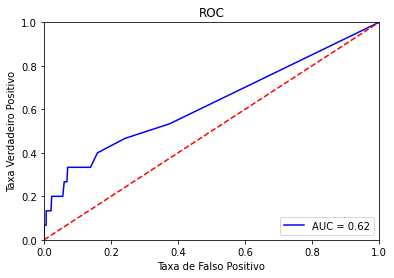

In [ ]:
pred_adamic = list(nx.adamic_adar_index(G_karate_train))

score_adamic = [s for (u, v, s) in pred_adamic]

label_adamic = [(u, v) in edge_subset for (u, v, s) in pred_adamic]

fpr_adamic, tpr_adamic, _ = metrics.roc_curve(label_adamic, score_adamic)
auc_adamic = roc_auc_score(label_adamic, score_adamic)
print(auc_adamic)


# Gráfico da curva ROC
plt.title("ROC")
plt.plot(fpr_adamic, tpr_adamic, "b", label="AUC = %0.2f" % auc_adamic)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("Taxa Verdadeiro Positivo")
plt.xlabel("Taxa de Falso Positivo")
plt.show()

### Todas as ROC

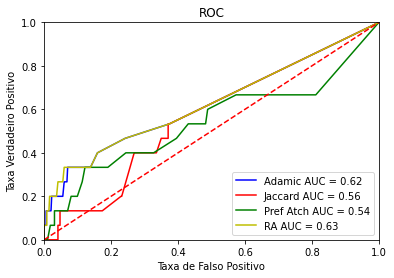

In [ ]:
plt.title("ROC")
plt.plot(fpr_adamic, tpr_adamic, "b", label="Adamic AUC = %0.2f" % auc_adamic)
plt.plot(fpr_jaccard, tpr_jaccard, "r", label="Jaccard AUC = %0.2f" % auc_jaccard)
plt.plot(fpr_prefAtch, tpr_prefAtch, "g", label="Pref Atch AUC = %0.2f" % auc_prefAtch)
plt.plot(fpr_ra, tpr_ra, "y", label="RA AUC = %0.2f" % auc_ra)
plt.legend(loc="lower right")
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("Taxa Verdadeiro Positivo")
plt.xlabel("Taxa de Falso Positivo")
plt.show()

# Predição de links da rede do Facebook

In [ ]:
import random
import re

import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

!pip install scikit-learn  -U


G_facebook = nx.read_edgelist(
    "facebook_combined.txt", create_using=nx.Graph(), nodetype=int
)
print(nx.info(G_facebook))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 2.4 MB/s eta 0:00:00m eta 0:00:010:00:01
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.1.2
    Uninstalling scikit-learn-1.1.2:
      Successfully uninstalled scikit-learn-1.1.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
node2vec 0.4.4 requires tqdm<5.0.0,>=4.55.1, but you have tqdm 4.47.0 which is incompatible.

[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: pip install --upgrade pip
Graph with 4039 nodes and 88234 edges


In [ ]:
A = nx.adjacency_matrix(G_facebook)
A.shape

(4039, 4039)

### Pegar todas as possibilidades de pares não conectados

In [ ]:
# para guardar todos os pares de nós não conectados
listUnconnected = []

# Varre a matriz de adjacência procurando por pares desconectados
offset = 0
for i in tqdm(range(A.shape[0])):
    for j in range(offset, A.shape[1]):
        if i != j:
            if A[i, j] == 0:
                listUnconnected.append([i, j])

    offset += 1

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4039/4039 [02:29<00:00, 27.07it/s]


In [ ]:
unlinked1 = [i[0] for i in listUnconnected]
unlinked2 = [i[1] for i in listUnconnected]

dfPairs = pd.DataFrame({"node1": unlinked1, "node2": unlinked2})

# cria a variável 'link', onde 0= sem link e 1 com link
dfPairs["link"] = 0
dfPairs

,node1,node2,link
0,0,348,0
1,0,349,0
2,0,350,0
3,0,351,0
4,0,352,0
...,...,...,...
8066502,4035,4037,0
8066503,4035,4038,0
8066504,4036,4037,0
8066505,4036,4038,0


### Removendo arestas do grafo original

In [ ]:
prop = 0.2
edge_subset = random.sample(
    G_facebook.edges(), int(prop * G_facebook.number_of_edges())
)

# Cria uma cópia do grafo e remove arestas
G_facebook_train = G_facebook.copy()
G_facebook_train.remove_edges_from(edge_subset)

In [ ]:
df = pd.DataFrame(edge_subset, columns=["node1", "node2"])
df["link"] = 1

dfPairs = dfPairs.append(df)
dfPairs

,node1,node2,link
0,0,348,0
1,0,349,0
2,0,350,0
3,0,351,0
4,0,352,0
...,...,...,...
17641,2039,2267,1
17642,1412,1830,1
17643,1275,1338,1
17644,2604,2646,1


### Node embeddings com o node2vec

In [ ]:
from node2vec import Node2Vec

# Gera caminhos
node2vec = Node2Vec(G_facebook_train, dimensions=100, walk_length=16, num_walks=50)

# treina o modelo node2vec
n2w_model = node2vec.fit(window=7, min_count=1)

Computing transition probabilities:   0%|          | 0/4039 [00:00<?, ?it/s]

Generating walks (CPU: 1): 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [01:49<00:00,  2.19s/it]


In [ ]:
# representa as arestas pela soma dos embeddings dos nós
featuresPares = [
    (n2w_model.wv[str(i)] + n2w_model.wv[str(j)])
    for i, j in zip(dfPairs["node1"], dfPairs["node2"])
]

### Separação dos dados para treino e teste

In [ ]:
# X                      #y
xtrain, xtest, ytrain, ytest = train_test_split(
    np.array(featuresPares), dfPairs["link"], test_size=0.3, random_state=10
)

### Teste com uma regressão logística

In [ ]:
lr = LogisticRegression(class_weight="balanced")

lr.fit(xtrain, ytrain)

LogisticRegression(class_weight='balanced')

### Fazendo predições

In [ ]:
predictions = lr.predict_proba(xtest)

### AUC

In [ ]:
roc_auc_score(ytest, predictions[:, 1])

0.7517274734597521

### Acurácia e F1-score

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

predicao = (predictions[:, 1] >= 0.5).astype(int)

print(accuracy_score(ytest, predicao))
print(f1_score(ytest, predicao))

0.6959392985288915
0.009796996984093307


## Teste com o LightGBM -- exemplo extra

In [ ]:
%pip install lightgbm

  Using cached lightgbm-3.3.2-py3-none-manylinux1_x86_64.whl (2.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import lightgbm as lgb

train_data = lgb.Dataset(xtrain, label=ytrain)
test_data = lgb.Dataset(xtest, label=ytest)

param = {"objective": "binary", "metric": "auc"}

num_round = 100

In [ ]:
bst = lgb.train(param, train_data, num_round)

[LightGBM] [Info] Number of positive: 12361, number of negative: 5646546
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 1.442463 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 5658907, number of used features: 100
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.002184 -> initscore=-6.124253
[LightGBM] [Info] Start training from score -6.124253


In [ ]:
ypred = bst.predict(xtest)
roc_auc_score(ytest, ypred)

0.9218055445358229